<a href="https://colab.research.google.com/github/nogfe4/Numerical-Methods-in-Chemical-Engineering/blob/main/C%C3%B3digos_IntroII_M%C3%A9todos_Computacionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capítulo 4**

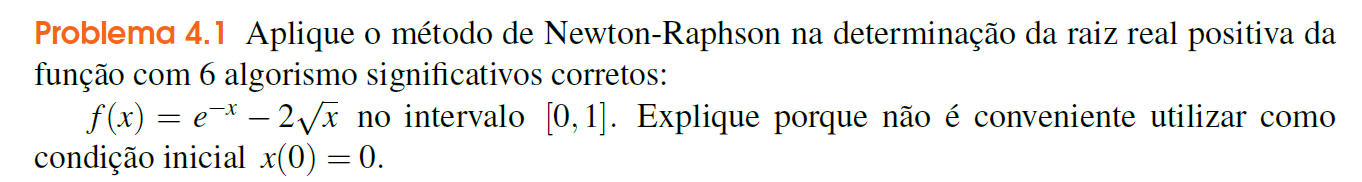

In [ ]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def função(x):
  if x < 0:
    return float('inf')
  else:
    f = mt.exp(-x) - 2*(mt.sqrt(x))
  return f

def numderivative(func, x, h=1e-6):
  nd = (função(x+h)-função(x-h))/(2*h)
  return nd

x0 = 0.15 #Chute Inicial
ITMAX = 1000 #Iterações
f0 = função(x0)
tol = 1e-6 #Tolerância
df0 = numderivative(função, x0)
passo = -f0 / df0
IT = 0

while abs(f0) > tol and IT < ITMAX:
  x1 = x0 + passo
  f1 = função(x1)
  if abs(f1) < abs(f0):
    x0 = x1
    f0 = f1
    df0 = numderivative(função, x0)
    passo = -f0/df0
  else:
      passo = passo/2
      IT = IT + 1

print(f"Raiz real positiva: {round(x1, 6)}")

Raiz real positiva: 0.175867


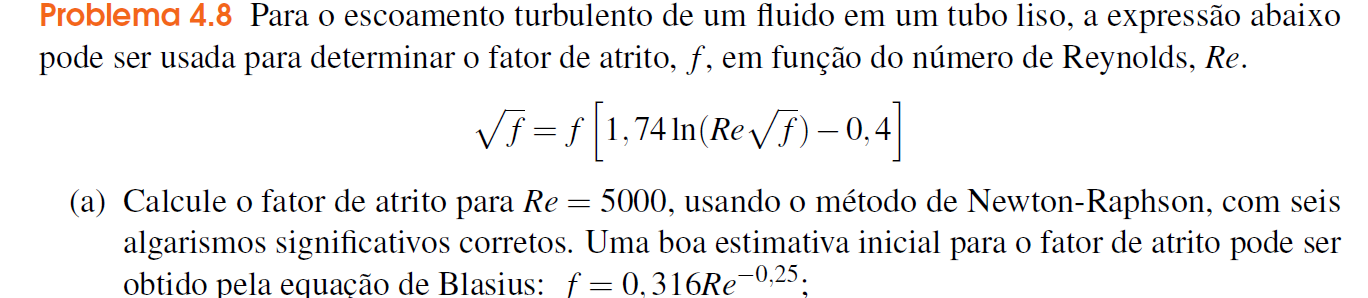

In [ ]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Re = 5000

def função(x):
  f = mt.sqrt(x) - x*(1.74*mt.log(Re*mt.sqrt(x))-0.4)
  return f

def numderivative(func, x, h=1e-6):
  nd = (função(x+h)-função(x-h))/(2*h)
  return nd

x0 = 0.316*(Re**(-0.25)) #Chute Inicial
ITMAX = 1000 #Iterações
f0 = função(x0)
tol = 1e-6 #Tolerância
df0 = numderivative(função, x0)
passo = -f0 / df0
IT = 0

while abs(f0) > tol and IT < ITMAX:
  x1 = x0 + passo
  f1 = função(x1)
  if abs(f1) < abs(f0):
    x0 = x1
    f0 = f1
    df0 = numderivative(função, x0)
    passo = -f0/df0
  else:
      passo = passo/2
      IT = IT + 1

print(f"Resultado Do Fator de Atrito: {round(x1 , 4)}")

Resultado Do Fator de Atrito: 0.0093


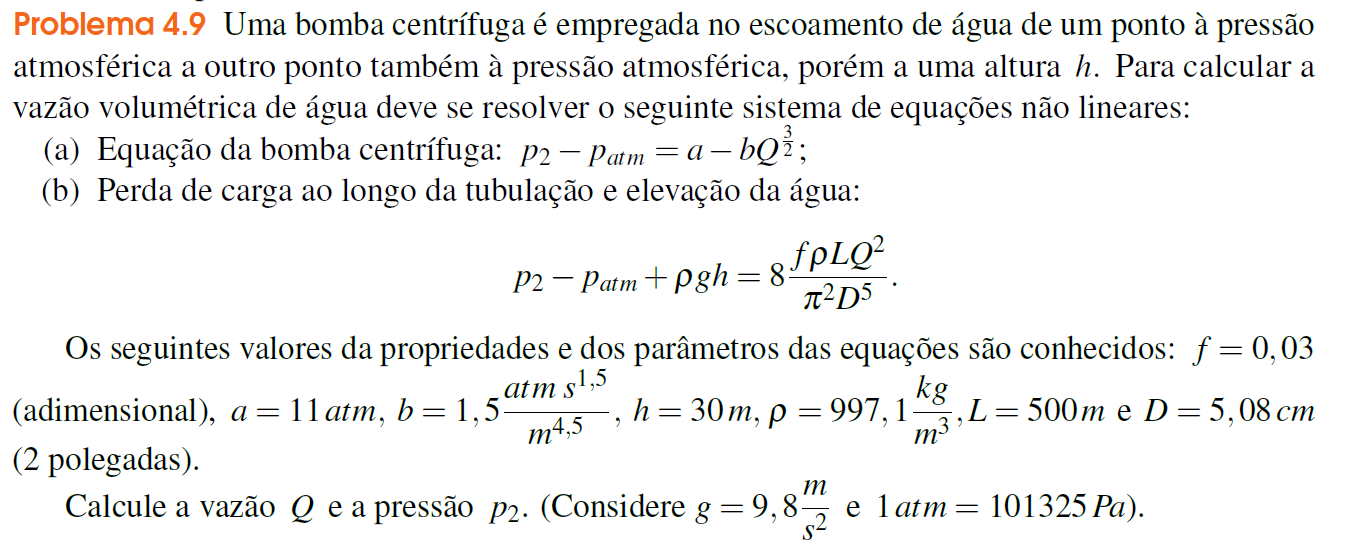

In [ ]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# a)
def func(q):
  f = (11*101325)-(1.5*101325)*q**(1.5)+(997.1)*(9.8)*(30) - (8*0.03*997.1*500*q**2)/(mt.pi**2*(0.0508**5))
  return f

def numderivative(f, x, h=1e-6):
  nd = (func(x+h)-func(x-h))/(2*h)
  return nd

q0 = 1000
tol = 1e-6
IT = 0
ITMAX = 100
f0 = func(q0)
df0 = numderivative(func, q0)
passo = -f0/df0

while abs(f0) > tol and IT < ITMAX:
  q1 = q0 + passo
  f1 = func(q1)
  if abs(f1) < abs(f0):
    q0 = q1
    f0 = f1
    df0 = numderivative(func, q0)
    passo = -f0/df0
  else:
    passo = passo/2
    IT = IT + 1

# b)
p2 = 101325-11-(1.5*q1**(1.5))

print(f"Resultado Da Perda de Carga ao longo da tubulação: {round(q1, 5)} m³/s")
print(f"Resultado Da Pressão P2: {round(p2, 5)} Pa")

Resultado Da Perda de Carga ao longo da tubulação: 0.00627 m³/s
Resultado Da Pressão P2: 101313.99926 Pa


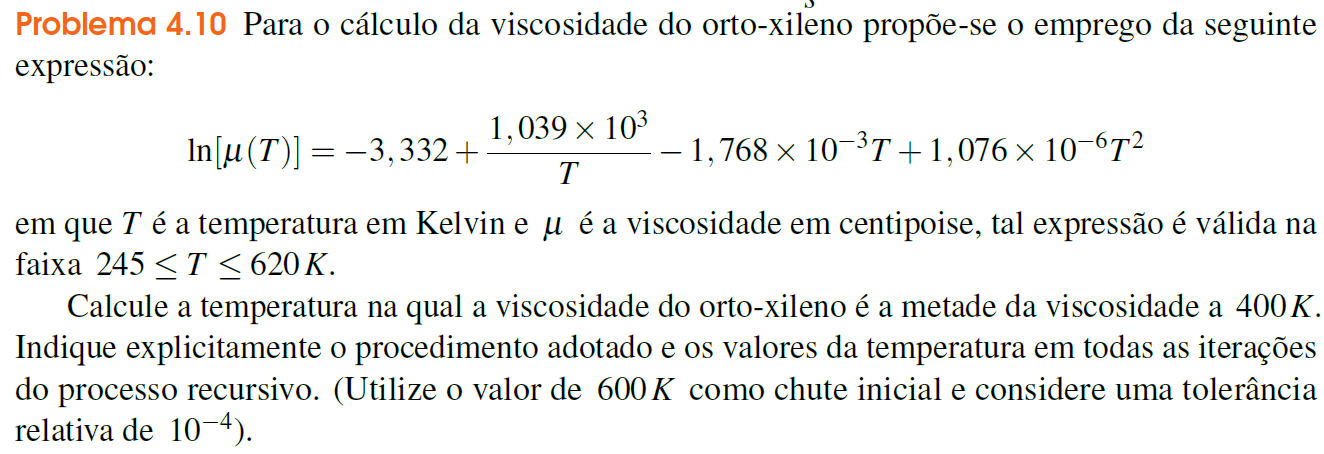

In [ ]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def viscosidade(T):
  if T < 245 and T > 620:
    print(f"Warning: Temperatura {round(T)} está fora da faixa válida")
  mu = mt.exp(-3.332 + (1.039e3 / T) - (1.768e-3 * T) + (1.076e-6 * T**2))
  return mu

def func3(T):
  f = (-3.332 + (1.039e3 / T) - (1.768e-3 * T) + (1.076e-6 * T**2)) - mt.log(viscosidade(400)/2)
  return f

def numderivative(f, x, h=1e-4):
  nd = (func3(x+h)-func3(x-h))/(2*h)
  return nd

T0 = 600 # Chute inicial
tol = 1e-4
ITMAX = 1000
f0 = func3(T0)
df0 = numderivative(func3, T0)
passo = -f0 / df0
IT = 0

while abs(f0) > tol and  IT < ITMAX:
  T1 = T0 + passo
  f1 = func3(T1)
  if abs(f1) < abs(f0):
    T0 = T1
    f0 = f1
    df0 = numderivative(func3, T0)
    passo = -f0/df0
  else:
    passo = passo/2
    IT = IT + 1

print(f"O Valor da temperatura é: {round(T1, 3)} K")

O Valor da temperatura é: 520.079 K


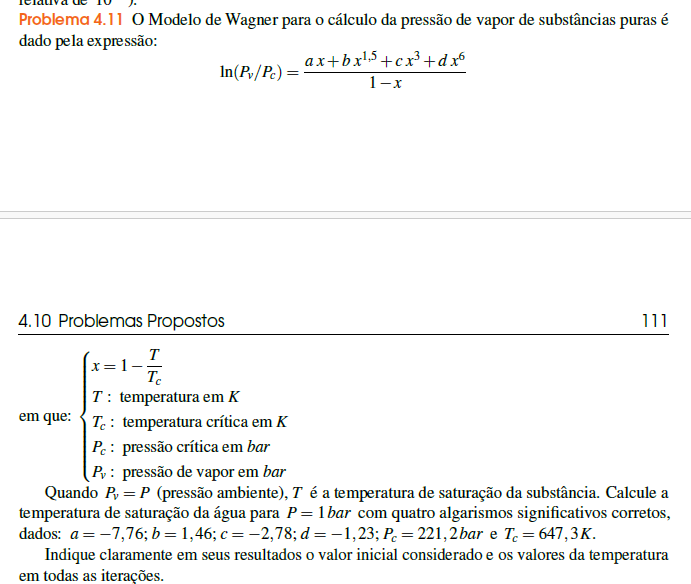

In [55]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
import seaborn as sns


def func4(T):
  Tc = 647.3
  x = (1 - (T/Tc))
  Pv = 1
  a = -7.76
  b = 1.46
  c = -2.78
  d = -1.23
  Pc = 221.2
  f = (((a*x)+(b*x**1.5)+(c*x**3)+(d*x**6))/(1-x)) - mt.log(Pv/Pc)
  return f

def numderivative(f, x, h=1e-8):
  nd = ((f(x+h)-f(x-h))/(2*h))
  return nd

T0 = 200 # Chute inicial
tol = 1e-6
ITMAX = 1000
f0 = func4(T0)
df0 = numderivative(func4, T0)
passo = -f0 / df0
IT = 0

historico = [(IT, T0, f0)]

while abs(f0) > tol and  IT < ITMAX:
  T1 = T0 + passo
  f1 = func4(T1)
  historico.append((IT, T1, f1))

  if abs(f1) < abs(f0):
    T0 = T1
    f0 = f1
    df0 = numderivative(func4, T0)
    passo = -f0/df0
  else:
    passo = passo/2
  IT = IT + 1

historico.append((IT, T0, f0))

df = pd.DataFrame(historico, columns=["Iteração", "Temperatura (K)", "f(T)"])

print(f"O Valor da temperatura é: {round(T0, 3)} K")
df.head(7)


O Valor da temperatura é: 372.667 K


,Iteração,Temperatura (K),f(T)
0,0,200.000000,-1.264419e+01
1,0,286.817725,-4.151032e+00
2,1,350.630132,-8.455431e-01
3,2,371.185495,-5.325950e-02
4,3,372.660391,-2.407843e-04
5,4,372.667120,-5.020135e-09
6,5,372.667120,-5.020135e-09


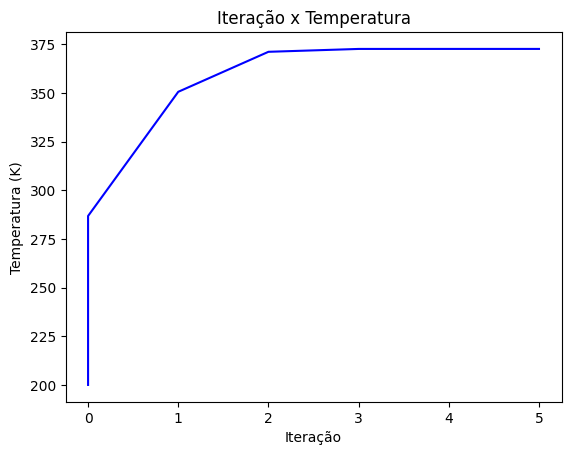

In [70]:
plt.plot(df['Iteração'], df['Temperatura (K)'], 'b')
plt.xlabel('Iteração')
plt.ylabel('Temperatura (K)')
plt.title('Iteração x Temperatura')
plt.show()

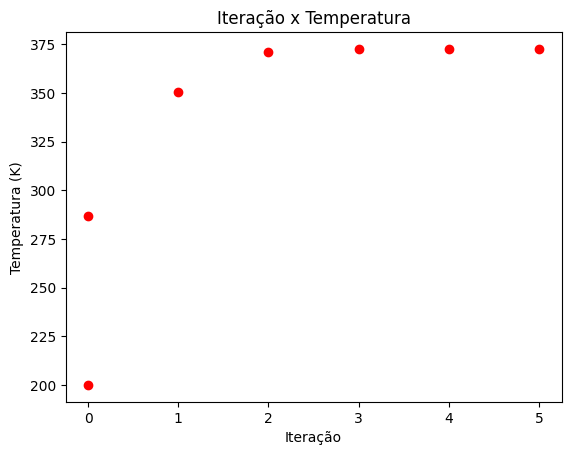

In [57]:
plt.scatter(df['Iteração'], df['Temperatura (K)'], color='r')
plt.xlabel('Iteração')
plt.ylabel('Temperatura (K)')
plt.title('Iteração x Temperatura')
plt.show()